In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!ls

Exercise_1.ipynb       ex1data1.txt           lib
computeCost.m          ex1data2.txt           normalEqn.m
computeCostMulti.m     featureNormalize.m     plotData.m
ex1.m                  gradientDescent.m      submit.m
ex1_multi.m            gradientDescentMulti.m warmUpExercise.m


In [3]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None)
data.columns = ['population','profit']

In [4]:
len(data)

97

In [5]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


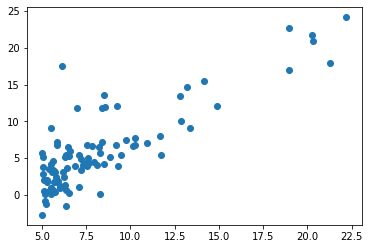

In [6]:
plt.scatter(data=data,x='population',y='profit')

# Apply Gradient Descent

In [7]:
X = data.population.values
X = X[:, np.newaxis]
y = data.profit.values
y = y[:, np.newaxis]

In [8]:
# add column of 1's to design matrix
ones = np.ones((X.shape[0],1))
X = np.hstack((ones, X))

In [9]:
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


In [10]:
def calculate_cost(theta, x, y):

    pred = np.dot(x, theta)
    error = pred - y
    cost = np.sum(np.power(error, 2))/(2*x.shape[0])
    
    return cost
    

In [14]:
def run_gradient_descent(theta, alpha, x, y, iterations):
    
    results = {}
    for it_num in range(iterations):
        error = np.dot(x, theta) - y
        slope = np.dot(error.T, x)/x.shape[0] * alpha
        theta = theta - slope.T
        results[it_num] = calculate_cost(theta, x, y)
    
    return results, theta

In [15]:
theta = np.zeros((2, 1)) # initialize fitting parameters
iterations = 1500
alpha = 0.01

results, optimal_theta = run_gradient_descent(theta, alpha, X, y, iterations)

In [16]:
calculate_cost(optimal_theta, X, y)

4.483388256587726

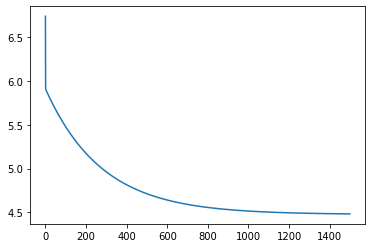

In [179]:
plt.plot(list(results.keys()), list(results.values()))

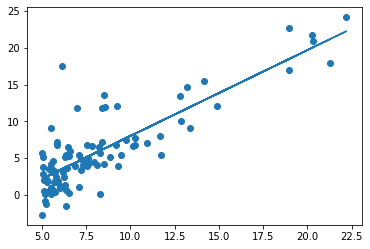

In [200]:
# plot prediction line with data
test = data.copy()
test['line'] = test['population']*optimal_theta[1][0] + optimal_theta[0]
plt.scatter(data=test, x='population', y='profit')
plt.plot(test['population'], test['line'])
plt.show()

# Portland Houses

In [206]:
data = pd.read_csv('ex1data2.txt', sep=",", header=None)
data.columns = ['house_size', 'bedroom_num', 'price']

In [207]:
data.head()

,house_size,bedroom_num,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [262]:
X = data.drop('price',axis=1).values
y = data[['price']].values

In [310]:
# normalize the features so gradient descent would converge faster
# in practice, the mean and std should be stored so the same statistics can be applied to test dataset
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_normalized = (X - means)/stds
# add in column of 1's 
X_normalized = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X_normalized))

In [358]:
theta = np.zeros((3, 1)) # initialize fitting parameters
iterations = 50
alpha = 0.9

results, optimal_theta = run_gradient_descent(theta, alpha, X_normalized, y, iterations)

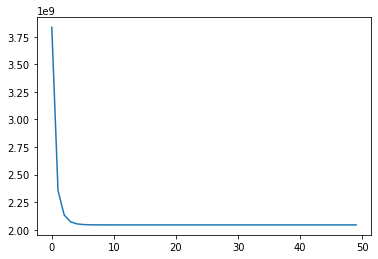

In [359]:
plt.plot(list(results.keys()), list(results.values()))

In [360]:
calculate_cost(optimal_theta, X_normalized, y)

2043280050.6028287

In [361]:
optimal_theta

array([[340412.65957447],
       [109447.79646899],
       [ -6578.35485351]])

In [362]:
test_values = np.array((1650, 3))
test_values_norm = (test_values - means)/stds
test_values_norm = np.hstack((np.ones(1), test_values_norm))

In [363]:
pred = np.dot(test_values_norm, optimal_theta)

In [364]:
pred

array([293081.46433504])

# Using Normal Equations

In [348]:
def compute_theta(x_mat, y_mat):
    
    inverse = np.linalg.inv(np.dot(x_mat.T, x_mat))
    theta = np.dot(np.dot(inverse, x_mat.T), y_mat)
    
    return theta

In [365]:
bias_X = np.hstack((np.ones(X.shape[0])[:, np.newaxis], X))
theta = compute_theta(bias_X, y)

In [366]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [375]:
bias_test_value = np.hstack((np.ones(1), test_values))
norm_pred = np.dot(bias_test_value, theta)

In [376]:
norm_pred

array([293081.46433489])